# Wine Quality Prediction — Visualization

## Import Libraries, Preferences, and Helper Functions

### Import Libraries

In [1]:
# System
import warnings

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Preferences

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Set the default Seaborn style
sns.set_theme(style='whitegrid', font='serif')

## Load the Data

In [5]:
data = pd.read_csv('../datasets/raw/white_wine.csv', delimiter=';')

# Display the first 5 rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## EDA: Overview

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
data.duplicated().sum()

937

## Data Cleaning

In [12]:
# Drop duplicates
data = data.drop_duplicates()

# Check for duplicates
data.duplicated().sum()

0

## EDA: Visualization

### Distribution of the Target Variable

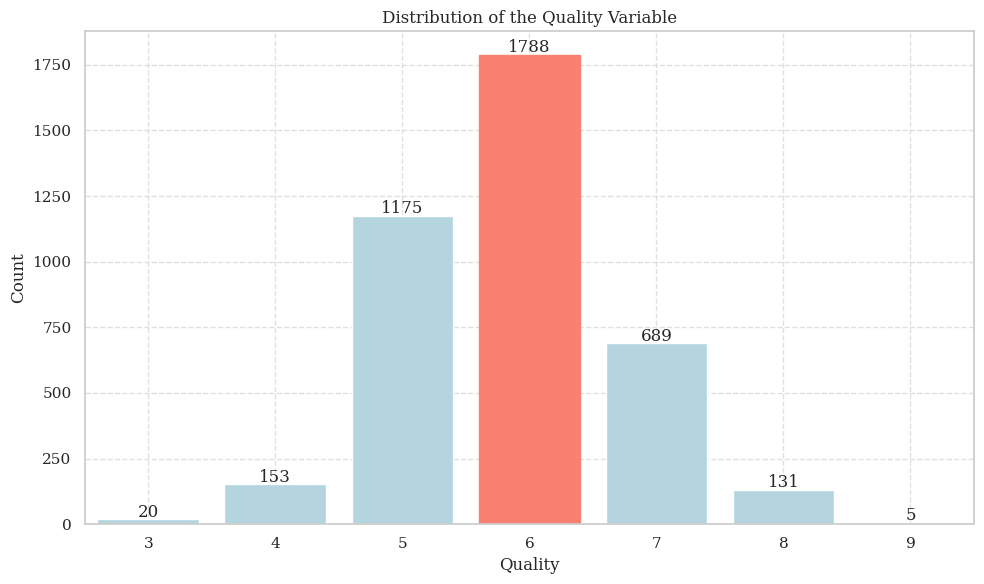

In [32]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the distribution of the target variable
ax = sns.countplot(data=data, x='quality', color='lightblue')

# Find the bar with the highest value
max_height = max([p.get_height() for p in ax.patches])
for p in ax.patches:
    if p.get_height() == max_height:
        p.set_color('salmon')

# Set the title and labels
plt.title('Distribution of the Quality Variable')
plt.xlabel('Quality')
plt.ylabel('Count')

# Add text annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add grid lines
plt.grid(linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

**Insights**
- The mofe frequent wine quality ratings are 5, 6, and 7.
- The distribution of quality ratings is not symmetrical, it leans slightly to the right. This means there are more ratings on the higher end of the quality scale than on the lower end.

### Alcohol vs. Volatile Acidity by Wine Quality

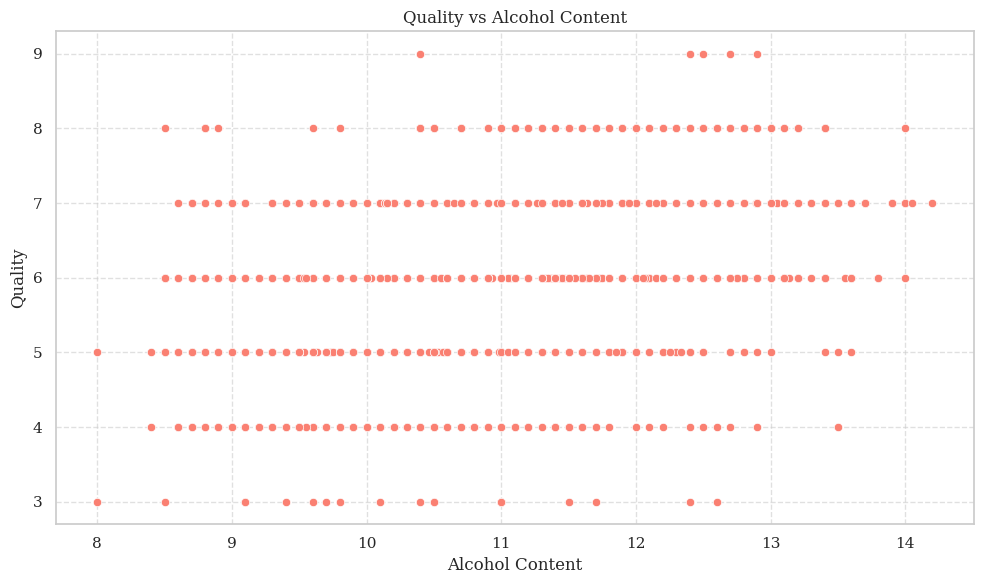

In [31]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the distribution of the target variable
sns.scatterplot(data=data, x='alcohol', y='quality', color='salmon')

# Set the title and labels
plt.title('Quality vs Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')

# Add grid lines
plt.grid(linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

**Insights**
- The graph suggests that alcohol content is sinificant factor in determining wine quality, with higher alcohol content wines generally having higher quality ratings.

### Distribution of Alcohol Content

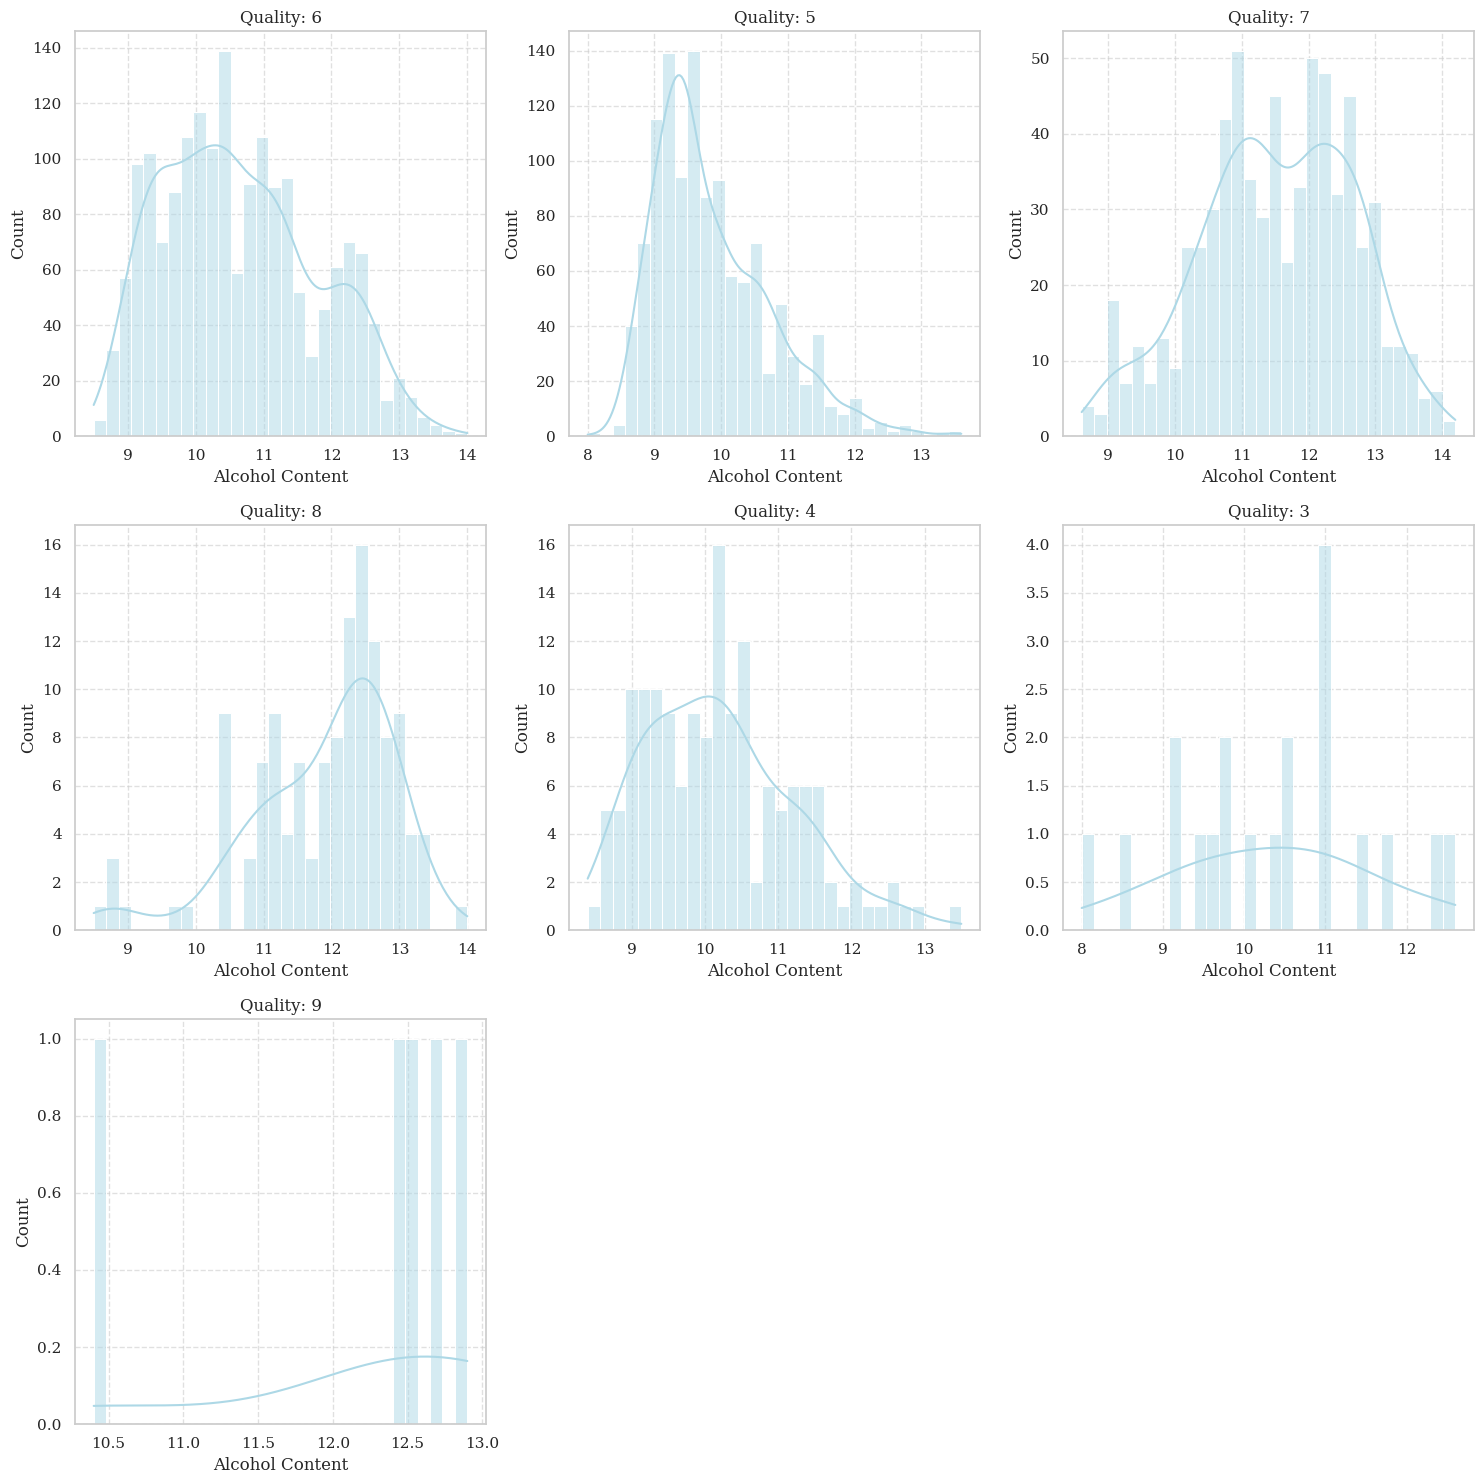

In [34]:
# Get unique quality values
qualities = data['quality'].unique()

# Set the figure size
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Plot the distribution of alcohol content for each quality
for i, quality in enumerate(qualities):
    ax = axes[i]
    sns.histplot(data[data['quality'] == quality], x='alcohol', kde=True, bins=30, ax=ax, color='lightblue')
    ax.set_title(f'Quality: {quality}')
    ax.set_xlabel('Alcohol Content')
    ax.set_ylabel('Count')
    ax.grid(linestyle='--', alpha=0.6)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Correlation Heatmap

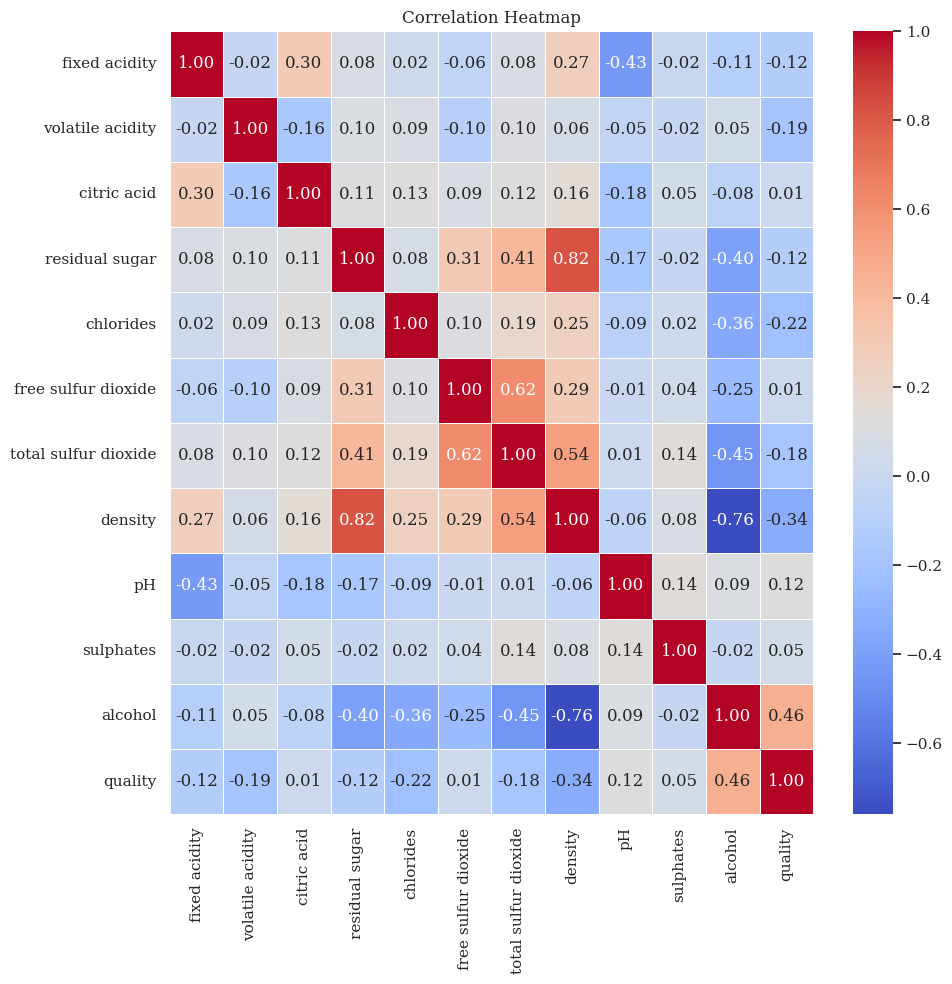

In [36]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.tight_layout()
plt.show()